# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import featureSelection as fs
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.shape

(569, 33)

In [99]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
#construct dataframe:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], 'target'))
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [10]:
 maximums = [df[feature].max() for feature in df.columns]
 miminums = [df[feature].min() for feature in df.columns]
 means    = [df[feature].mean() for feature in df.columns]

In [11]:
df.describe().transpose()

count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.021855    0.757000   
area error               569.0   40.337079   45.491006    6.802000   
smoothness error         569.0    0.007041    0.003003    0.001713   
compactness error        569.0    0.025478    0.017908    0.002252   
concavity error          569.0    0.031894    0.030186    0.000000   
concave points error     569.0    0.011796    0.006170    0.000000   
symmetry error           569.0    0.020542    0.008266    0.007882   
fractal dimension error  569.0    0.003795    0.002646    0.000895   
worst radius             569.0   16.269190    4.833242    7.930000   
worst texture            569.0   25.677223    6.146258   12.020000   
worst perimeter          569.0  107.261213   33.602542   50.410000   
worst area               569.0  880.583128  569.356993  185.200000   
worst smoothness         569.0    0.132369    0.022832    0.071170   
worst compactness        569.0    0.254265    0.157336    0.027290   
worst concavity          569.0    0.272188    0.208624    0.000000   
worst concave points     569.0    0.114606    0.065732    0.000000   
worst symmetry           569.0    0.290076    0.061867    0.156500   
worst fractal dimension  569.0    0.083946    0.018061    0.055040   
target                   569.0    0.627417    0.483918    0.000000   

                                25%         50%          75%         max  
mean radius               11.700000   13.370000    15.780000    28.11000  
mean texture              16.170000   18.840000    21.800000    39.28000  
mean perimeter            75.170000   86.240000   104.100000   188.50000  
mean area                420.300000  551.100000   782.700000  2501.00000  
mean smoothness            0.086370    0.095870     0.105300     0.16340  
mean compactness           0.064920    0.092630     0.130400     0.34540  
mean concavity             0.029560    0.061540     0.130700     0.42680  
mean concave points        0.020310    0.033500     0.074000     0.20120  
mean symmetry              0.161900    0.179200     0.195700     0.30400  
mean fractal dimension     0.057700    0.061540     0.066120     0.09744  
radius error               0.232400    0.324200     0.478900     2.87300  
texture error              0.833900    1.108000     1.474000     4.88500  
perimeter error            1.606000    2.287000     3.357000    21.98000  
area error                17.850000   24.530000    45.190000   542.20000  
smoothness error           0.005169    0.006380     0.008146     0.03113  
compactness error          0.013080    0.020450     0.032450     0.13540  
concavity error            0.015090    0.025890     0.042050     0.39600  
concave points error       0.007638    0.010930     0.014710     0.05279  
symmetry error             0.015160    0.018730     0.023480     0.07895  
fractal dimension error    0.002248    0.003187     0.004558     0.02984  
worst radius              13.010000   14.970000    18.790000    36.04000  
worst texture             21.080000   25.410000    29.720000    49.54000  
worst perimeter           84.110000   97.660000   125.40000

In [12]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [38]:
X = df.drop('target', axis=1)
y = df['target']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Data Analysis

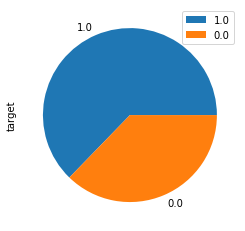

In [13]:
df['target'].value_counts().plot(kind='pie', legend=True)

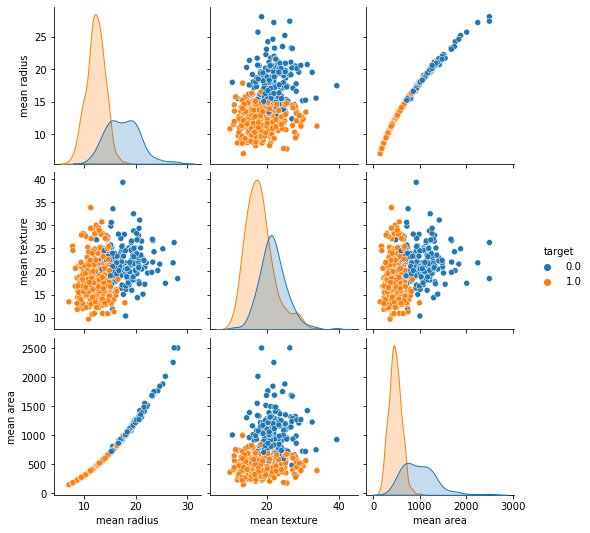

In [14]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area'])

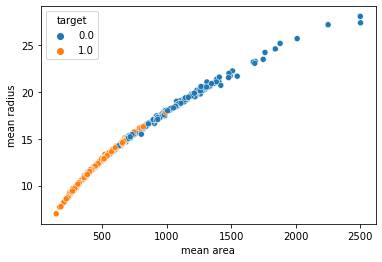

In [15]:
# separation of data (mean area vs mean smoothness)
sns.scatterplot(x = 'mean area', y = 'mean radius', hue='target', data = df)

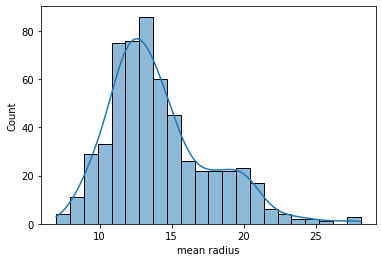

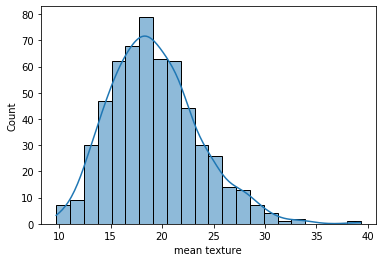

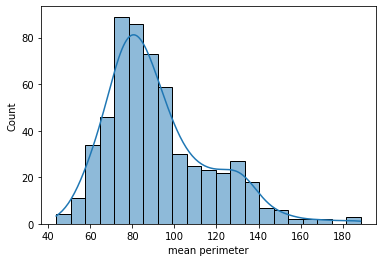

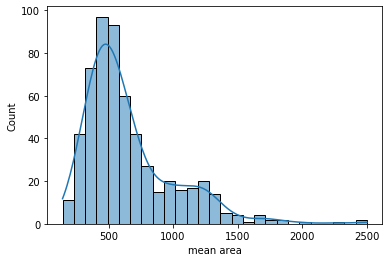

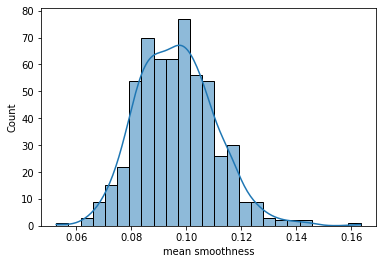

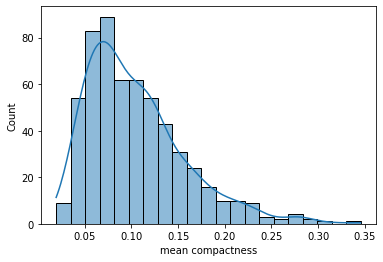

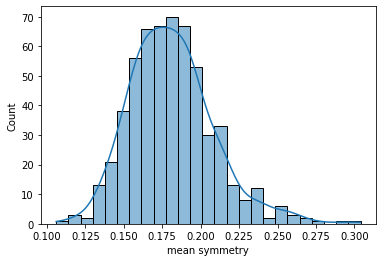

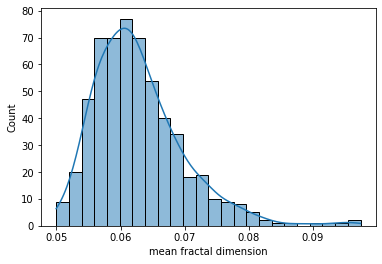

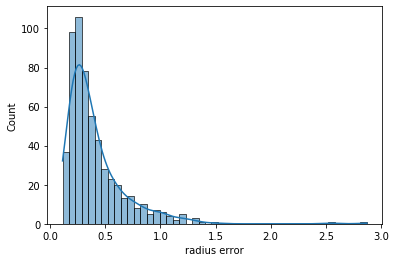

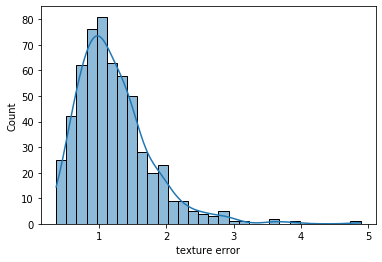

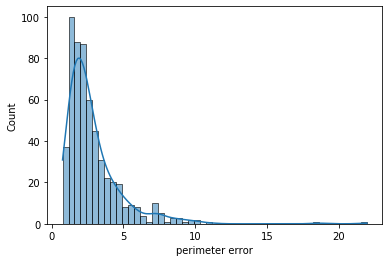

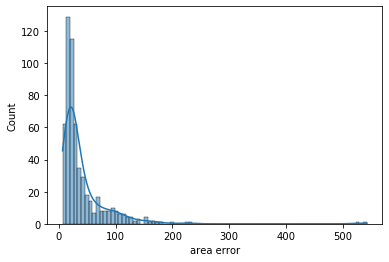

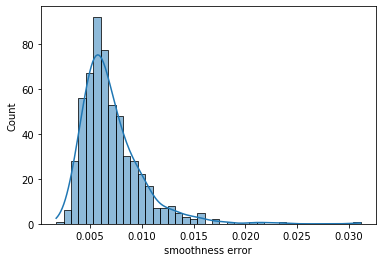

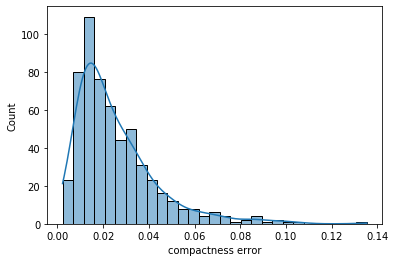

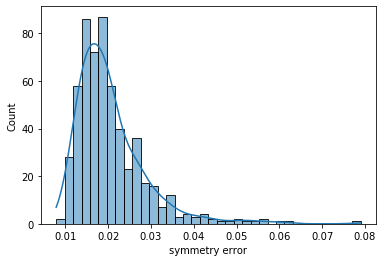

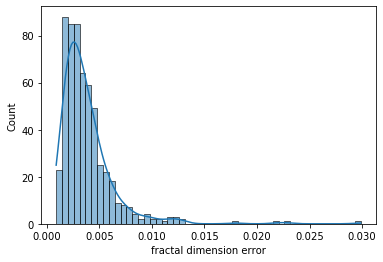

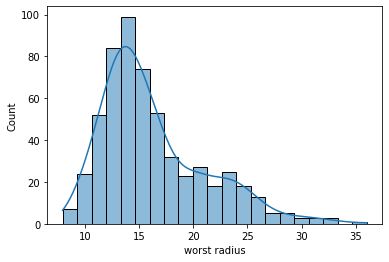

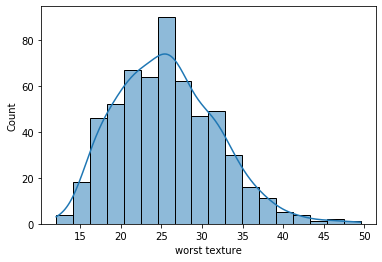

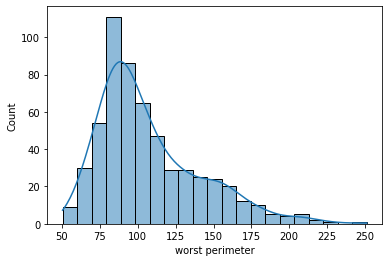

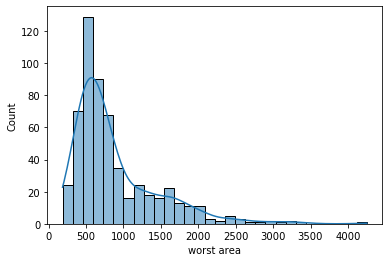

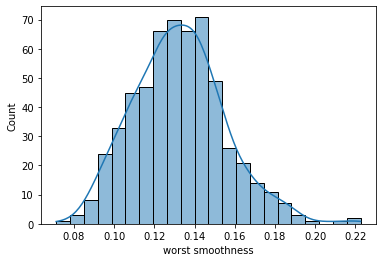

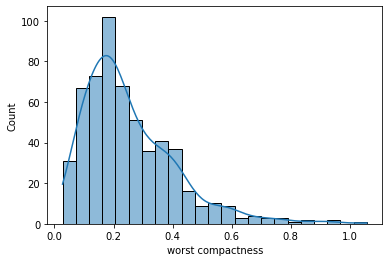

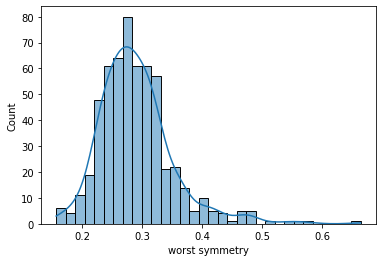

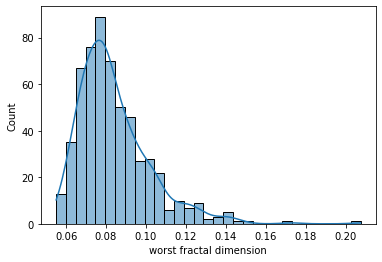

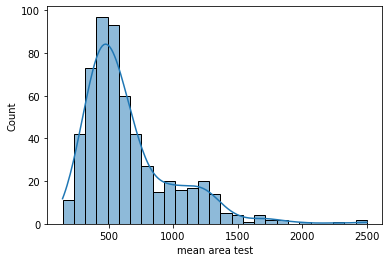

In [79]:
def analyse_features(df, var):
    df = df.copy()
    if 0 in df[var].unique():
        pass
    else:
        sns.histplot(data=df[var], kde=True)
        plt.show()

for var in df.columns:
    analyse_features(df,var)

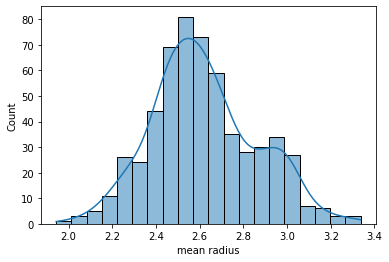

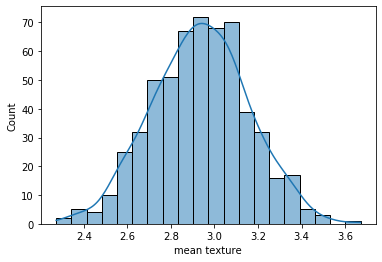

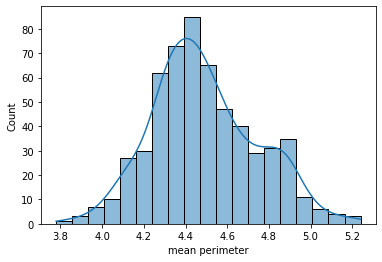

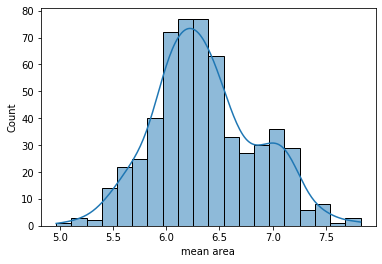

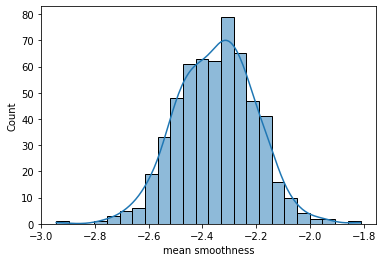

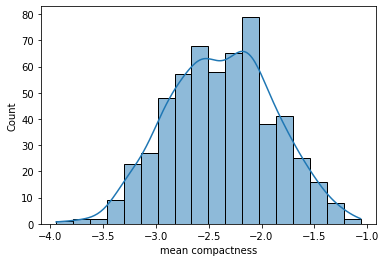

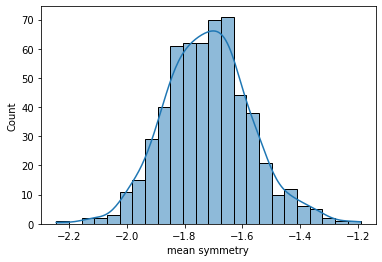

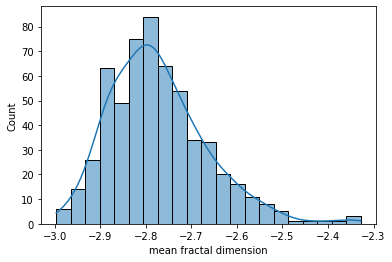

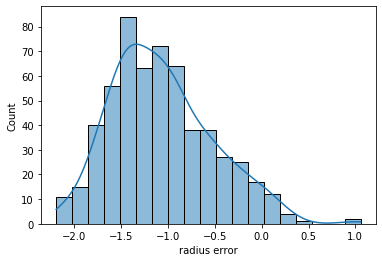

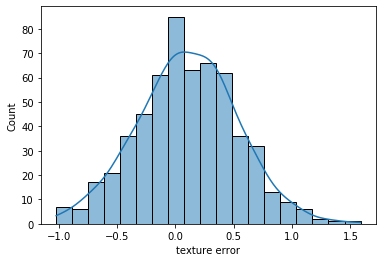

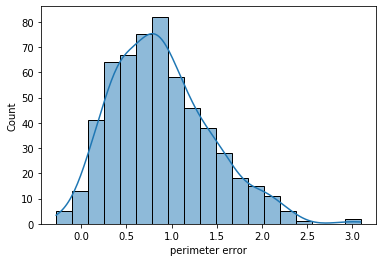

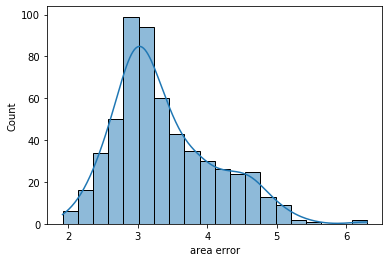

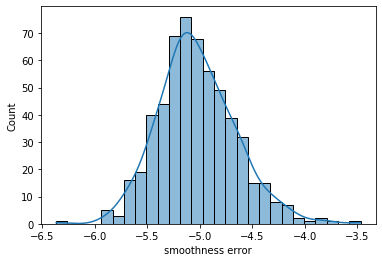

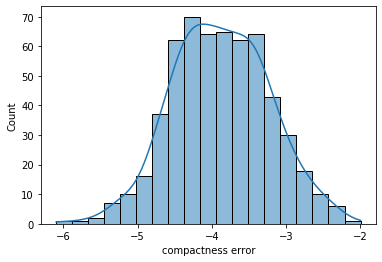

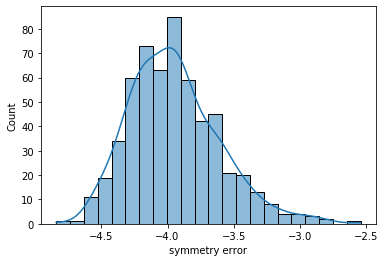

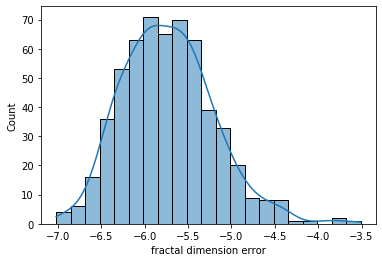

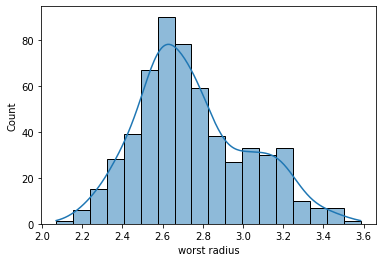

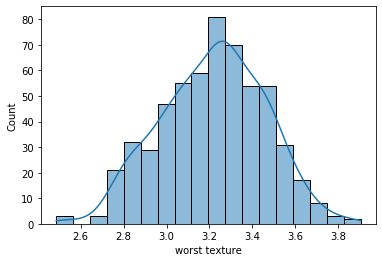

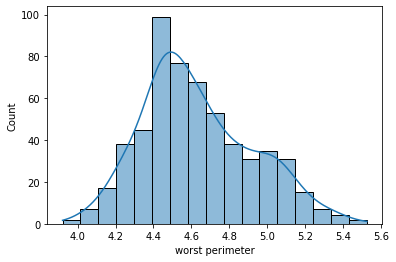

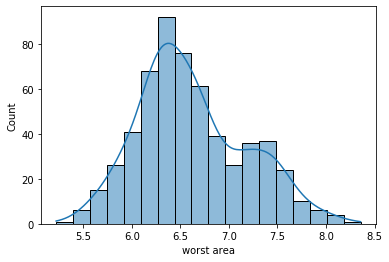

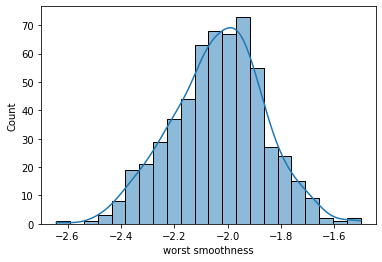

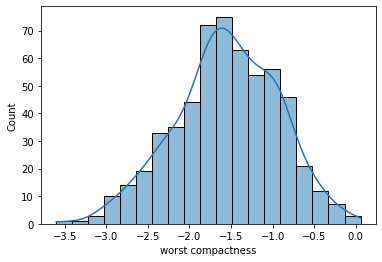

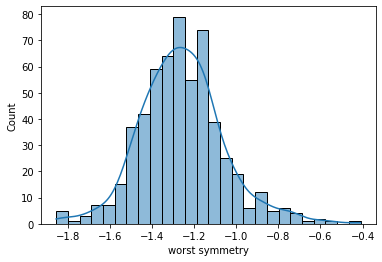

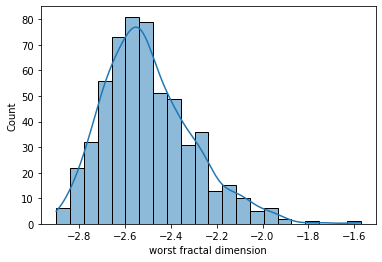

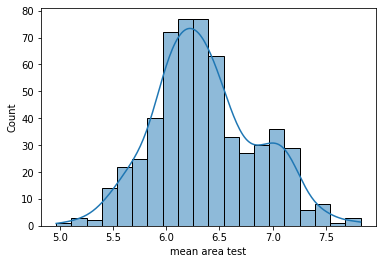

In [80]:
def analyse_features(df, var):
    df = df.copy()
    if 0 in df[var].unique():
        pass
    else:
        sns.histplot(data=np.log(df[var]), kde=True)
        #np.log(df[var]).hist(bins=20)
        plt.show()

for var in df.columns:
    analyse_features(df,var)

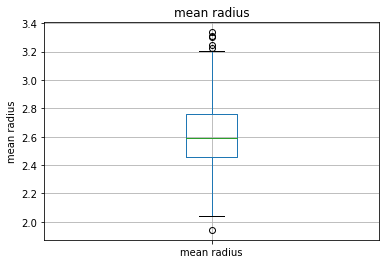

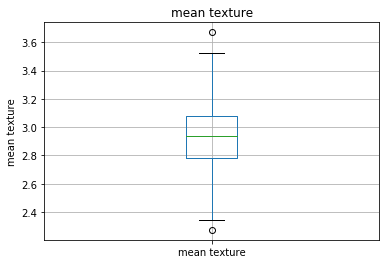

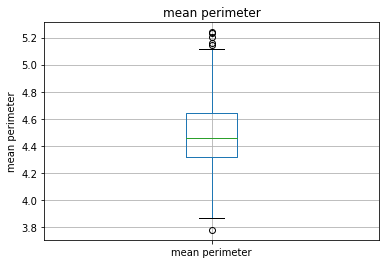

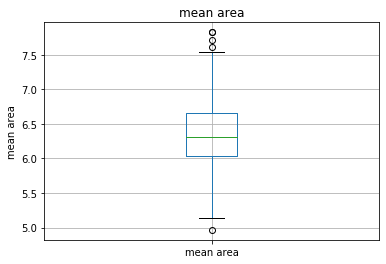

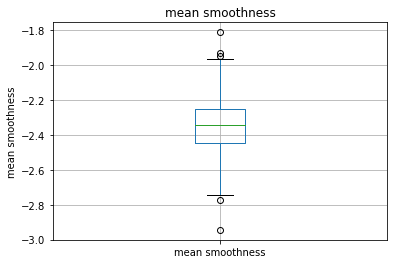

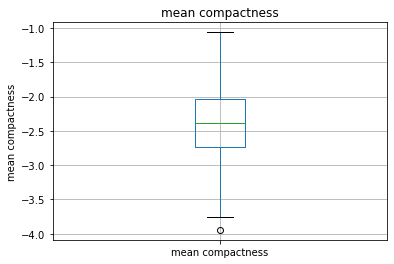

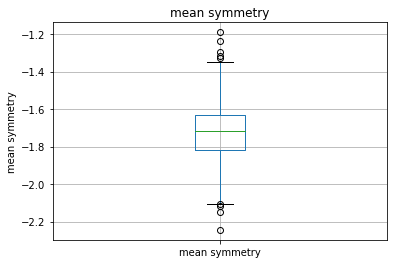

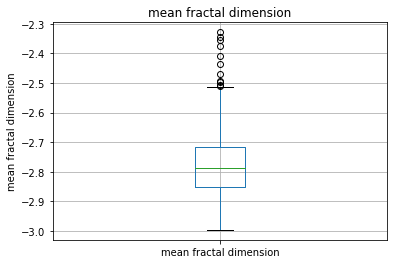

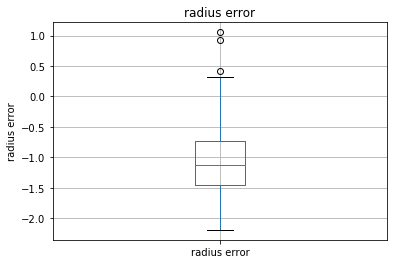

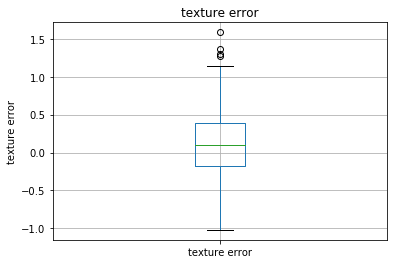

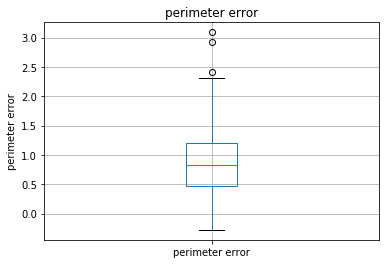

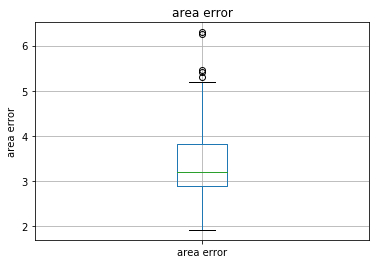

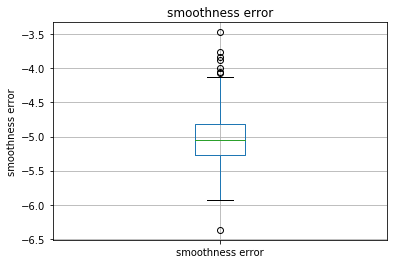

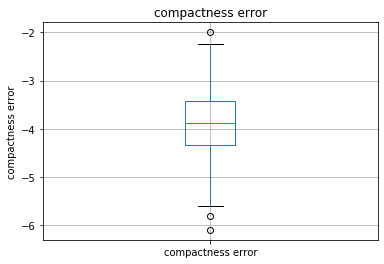

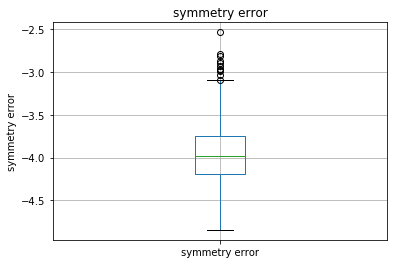

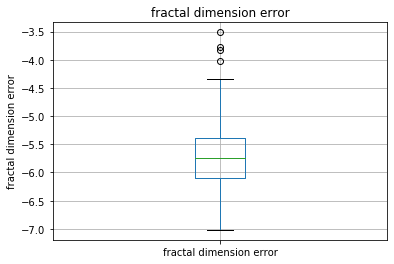

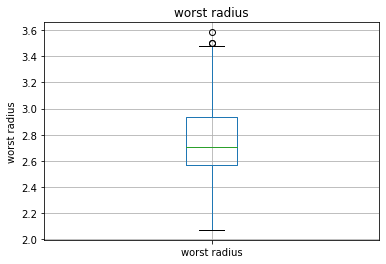

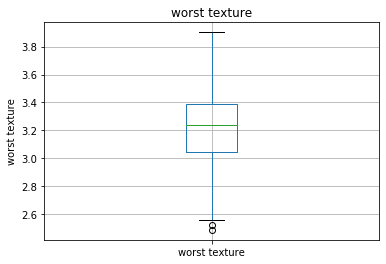

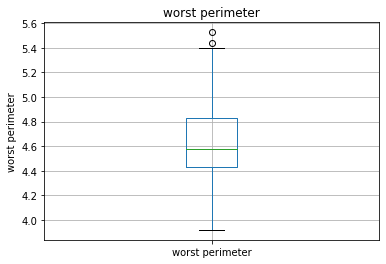

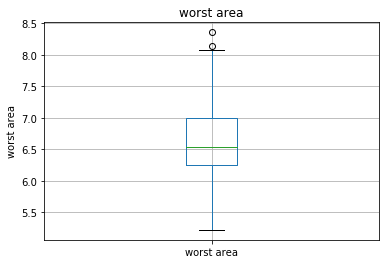

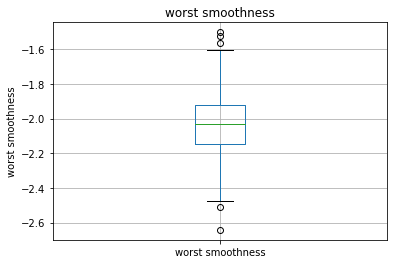

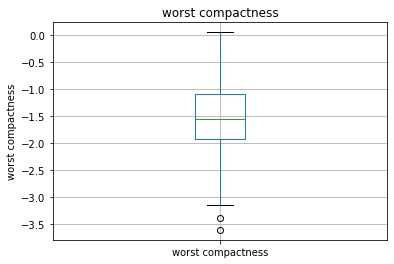

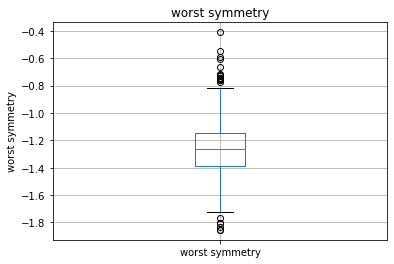

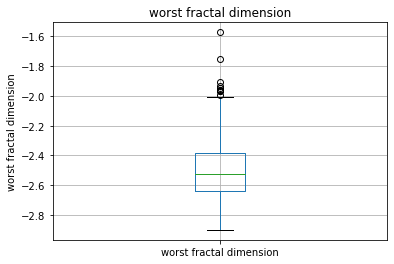

In [248]:
def find_outliers(df, var):
    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

for var in df.columns:
    find_outliers(df,var)

In [82]:
df.columns.tolist()

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target',
 'mean area test']

# Feature Engineering

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [250]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [251]:
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 1]
vars_with_na

[]

In [252]:
if vars_with_na:
    for var in vars_with_na:
        print(var, 'percentage of missing value:', np.round(df[var].isnull().mean(),3))
else:
    print('There is no NA')

There is no NA


In [253]:
numerical_var = [var for var in df.columns if df[var].dtypes != 'O']
numerical_var

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [254]:
discrete_var = [var for var in numerical_var if len(df[var].unique()) < 20]
discrete_var

['target']

In [255]:
continous_var = [var for var in df.columns.drop('target') if var is not discrete_var]
continous_var

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [256]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [257]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


In [258]:
#pd.concat([X_train_scaled.describe().T, X_train.describe().T], axis=1)


# Feature Selection

## Constant and Quasi-constant Features

In [259]:
constant_feature = [feature for feature in X_train.columns if X_train[feature].nunique() == 1]
#constant_feature = [feature for feature in X_train.columns if X_train[feature].std() == 0]

In [260]:
len(constant_feature)

0

In [261]:
def  quasi_constant(data, percentage):
        quasi_constant_feature = []
        for feature in data.columns:
            predominant = (data[feature].value_counts() / np.float(len(data))).sort_values(ascending=False).values[0]
            if predominant > percentage:
                quasi_constant_feature.append(feature)
        return quasi_constant_feature

In [262]:
len(quasi_constant(X_train,0.95))

0

## 2.2: Duplication

In [42]:
def duplicateColumns(data):
        duplicated_feat_pairs = {}
        _duplicated_feat = []

        for i in range(0, len(data.columns)):
            if i % 5 == 0:
                print(i)
            feat_1 = data.columns[i]
            if feat_1 not in _duplicated_feat:
                duplicated_feat_pairs[feat_1] = []

                for feat_2 in data.columns[i + 1:]:
                    if data[feat_1].equals(data[feat_2]):
                        duplicated_feat_pairs[feat_1].append(feat_2)
                        _duplicated_feat.append(feat_2)
        print('--------')
        return _duplicated_feat, duplicated_feat_pairs

In [34]:
#df['mean area test'] = df['mean area']
#df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst perimeter  worst area  worst smoothness  \
0                 0.07871  ...           184.60      2019.0            0.1622   
1                 0.05667  ...           158.80      1956.0            0.1238   
2                 0.05999  ...           152.50      1709.0            0.1444   
3                 0.09744  ...            98.87       567.7            0.2098   
4                 0.05883  ...           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  mean area test  
0                  0.11890     0.0          1001.0  
1                  0.08902     0.0          1326.0  
2                  0.08758     0.0          1203.0  
3                  0.17300     0.0           386.1  
4                  0.07678     0.0          1297.0  

[5 rows x 32 columns]

In [46]:

_duplicated_feat, duplicated_feat_pairs = duplicateColumns(X_train)
print(_duplicated_feat)
duplicated_feat_pairs
                

0
5
10
15
20
25
30
--------
['mean area test']


{'mean radius': [],
 'mean texture': [],
 'mean perimeter': [],
 'mean area': ['mean area test'],
 'mean smoothness': [],
 'mean compactness': [],
 'mean concavity': [],
 'mean concave points': [],
 'mean symmetry': [],
 'mean fractal dimension': [],
 'radius error': [],
 'texture error': [],
 'perimeter error': [],
 'area error': [],
 'smoothness error': [],
 'compactness error': [],
 'concavity error': [],
 'concave points error': [],
 'symmetry error': [],
 'fractal dimension error': [],
 'worst radius': [],
 'worst texture': [],
 'worst perimeter': [],
 'worst area': [],
 'worst smoothness': [],
 'worst compactness': [],
 'worst concavity': [],
 'worst concave points': [],
 'worst symmetry': [],
 'worst fractal dimension': []}

In [ ]:
#df.drop('area mean test', axis=1, inplace=True)

## 2.3: Correlation 

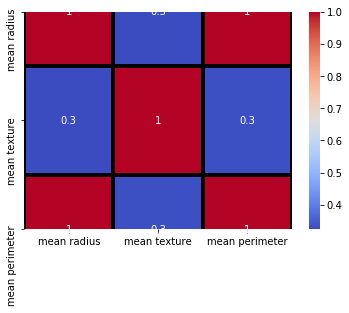

In [70]:
selected_corr = df[['mean radius', 'mean texture', 'mean perimeter']].corr()
sns.heatmap(selected_corr, annot=True, fmt='.1g', cmap='coolwarm', linewidth=3,linecolor='black')

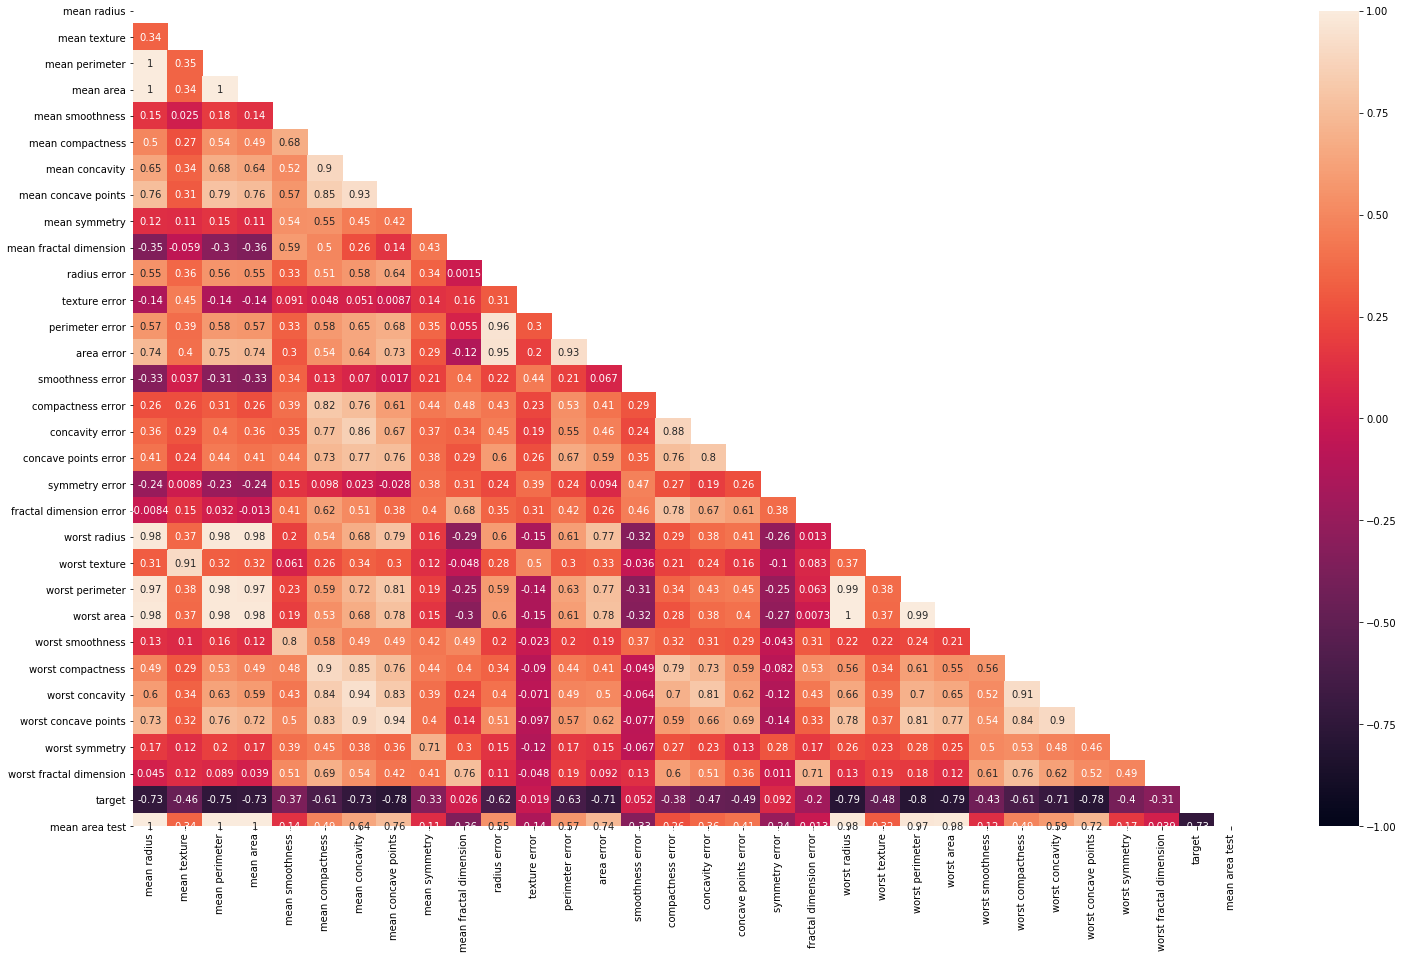

In [69]:
plt.figure(figsize =(25,15))
sns.heatmap(df.corr()), annot=True, vmin=-1, vmax=1, mask=np.triu(df.corr()))

In [54]:
def correlation(df, threshold):
        col_corr = set()
        correlation_info=[]
        corr_matrix = df.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold: 
                    correlation_info.append([abs(corr_matrix.iloc[i, j]) , corr_matrix.columns[i] , corr_matrix.columns[j]])
                    colname = corr_matrix.columns[j]
                    col_corr.add(colname)
                    correlation_dataframe = pd.DataFrame(sorted(correlation_info, key=lambda x: x[0], reverse=True),columns=['Correlation', 'Feature 1', 'feature 2'])
        return col_corr, correlation_dataframe

In [55]:
corr_features, correlation_dataframe = correlation(X_train, 0.95)
print(correlation_dataframe)
print('------------')
print(f'Length of correlated features: {len(set(corr_features))}')
print('-------------')
corr_features

    Correlation        Feature 1        feature 2
0      1.000000   mean area test        mean area
1      0.997875   mean perimeter      mean radius
2      0.993707  worst perimeter     worst radius
3      0.987811        mean area      mean radius
4      0.987811   mean area test      mean radius
5      0.987255        mean area   mean perimeter
6      0.987255   mean area test   mean perimeter
7      0.985133       worst area     worst radius
8      0.979833       worst area  worst perimeter
9      0.977384  perimeter error     radius error
10     0.971769  worst perimeter   mean perimeter
11     0.971276     worst radius   mean perimeter
12     0.971032     worst radius      mean radius
13     0.966330  worst perimeter      mean radius
14     0.962555     worst radius        mean area
15     0.962555   mean area test     worst radius
16     0.962461       worst area        mean area
17     0.962461   mean area test       worst area
18     0.959490  worst perimeter        mean area


{'mean area',
 'mean perimeter',
 'mean radius',
 'radius error',
 'worst area',
 'worst perimeter',
 'worst radius'}

In [268]:
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

In [269]:
X_train_corr.drop(labels=corr_features, axis=1, inplace=True)
X_test_corr.drop(labels=corr_features, axis=1, inplace=True)

In [270]:
X_train_corr.shape, X_test_corr.shape

((455, 24), (114, 24))

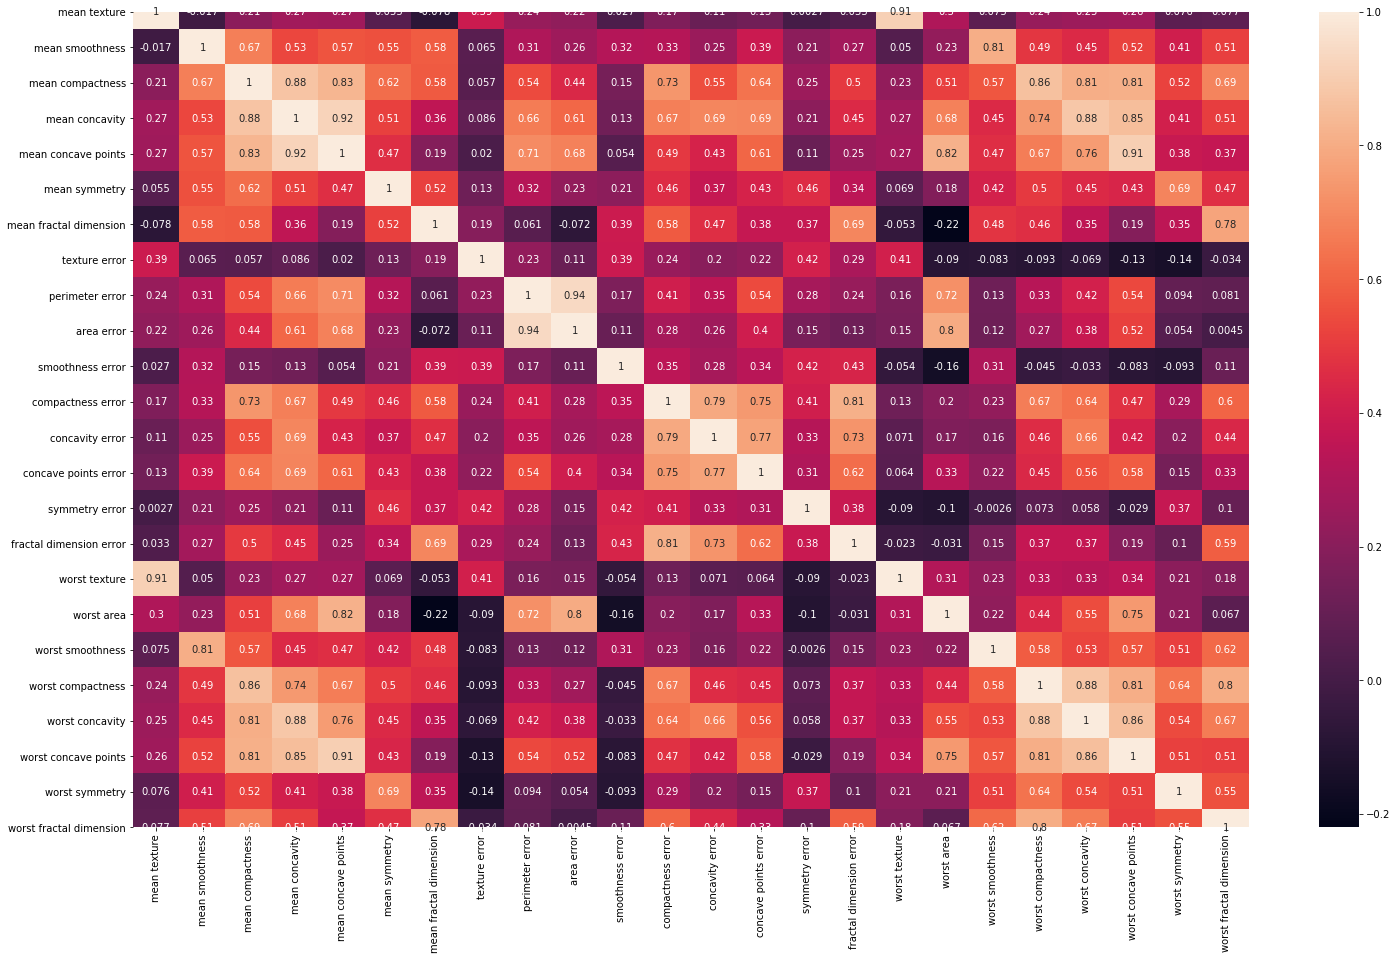

In [271]:
# Corrolation between features
plt.figure(figsize =(25,15))
sns.heatmap(X_train_corr.corr(), annot=True)

In [278]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.95]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'Correlation']
corrmat.head()

feature1         feature2  Correlation
0   mean perimeter      mean radius     0.997733
1      mean radius   mean perimeter     0.997733
2     worst radius  worst perimeter     0.993437
3  worst perimeter     worst radius     0.993437
4        mean area      mean radius     0.986422

In [279]:
corrmat.shape

(30, 3)

In [280]:
set(corrmat.feature1)

{'area error',
 'mean area',
 'mean perimeter',
 'mean radius',
 'perimeter error',
 'radius error',
 'worst area',
 'worst perimeter',
 'worst radius'}

In [281]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        correlated_groups.append(correlated_block)

print(f'We have found {len(correlated_groups)} correlated groups out of {X_train.shape[1]} total features')

We have found 3 correlated groups out of 30 total features


In [282]:
for i, group in enumerate(correlated_groups):
    print('Group',i+1, '---------------------------------------------------')
    print(group)
    print()
   


Group 1 ---------------------------------------------------
          feature1         feature2  Correlation
0   mean perimeter      mean radius     0.997733
6   mean perimeter        mean area     0.985621
15  mean perimeter  worst perimeter     0.969363
19  mean perimeter     worst radius     0.967911

Group 2 ---------------------------------------------------
      feature1         feature2  Correlation
8   worst area     worst radius     0.983137
10  worst area  worst perimeter     0.976869
22  worst area        mean area     0.959043

Group 3 ---------------------------------------------------
        feature1         feature2  Correlation
12  radius error  perimeter error     0.973010
29  radius error       area error     0.950724



In [283]:
from sklearn.ensemble import RandomForestClassifier
selected_features = []
for i, group in enumerate(correlated_groups):
    features = list(group['feature2'].unique()) + list(group['feature1'].unique())
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train[features].fillna(0), y_train)

    importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)], axis=1)
    print('Group' , i+1)
    importance.columns = ['feature', 'importance']
    importance_df=importance.sort_values(by='importance', ascending=False).reset_index(drop=True)
    print(importance_df)

    selected_features.append(importance_df.at[0,'feature'])
    print('------------------------------')


Group 1
           feature  importance
0  worst perimeter    0.385176
1     worst radius    0.292064
2        mean area    0.155587
3   mean perimeter    0.097582
4      mean radius    0.069590
------------------------------
Group 2
           feature  importance
0  worst perimeter    0.378359
1     worst radius    0.299410
2       worst area    0.256506
3        mean area    0.065725
------------------------------
Group 3
           feature  importance
0       area error    0.469678
1  perimeter error    0.277856
2     radius error    0.252466
------------------------------


In [286]:
selected_features=set(selected_features)
selected_features

{'area error', 'worst perimeter'}

In [287]:
correlated_features=set(corrmat.feature1)
correlated_features

{'area error',
 'mean area',
 'mean perimeter',
 'mean radius',
 'perimeter error',
 'radius error',
 'worst area',
 'worst perimeter',
 'worst radius'}

In [288]:
difference_feature =correlated_features.difference(selected_features)

In [289]:
difference_feature

{'mean area',
 'mean perimeter',
 'mean radius',
 'perimeter error',
 'radius error',
 'worst area',
 'worst radius'}

In [290]:
corr_features

{'mean area',
 'mean perimeter',
 'mean radius',
 'radius error',
 'worst perimeter',
 'worst radius'}

In [291]:
X_train_corr_rf = X_train.copy()
X_test_corr_rf= X_test.copy()

In [292]:
X_train_corr_rf.drop(labels=difference_feature, axis=1, inplace=True)
X_test_corr_rf.drop(labels=difference_feature, axis=1, inplace=True)

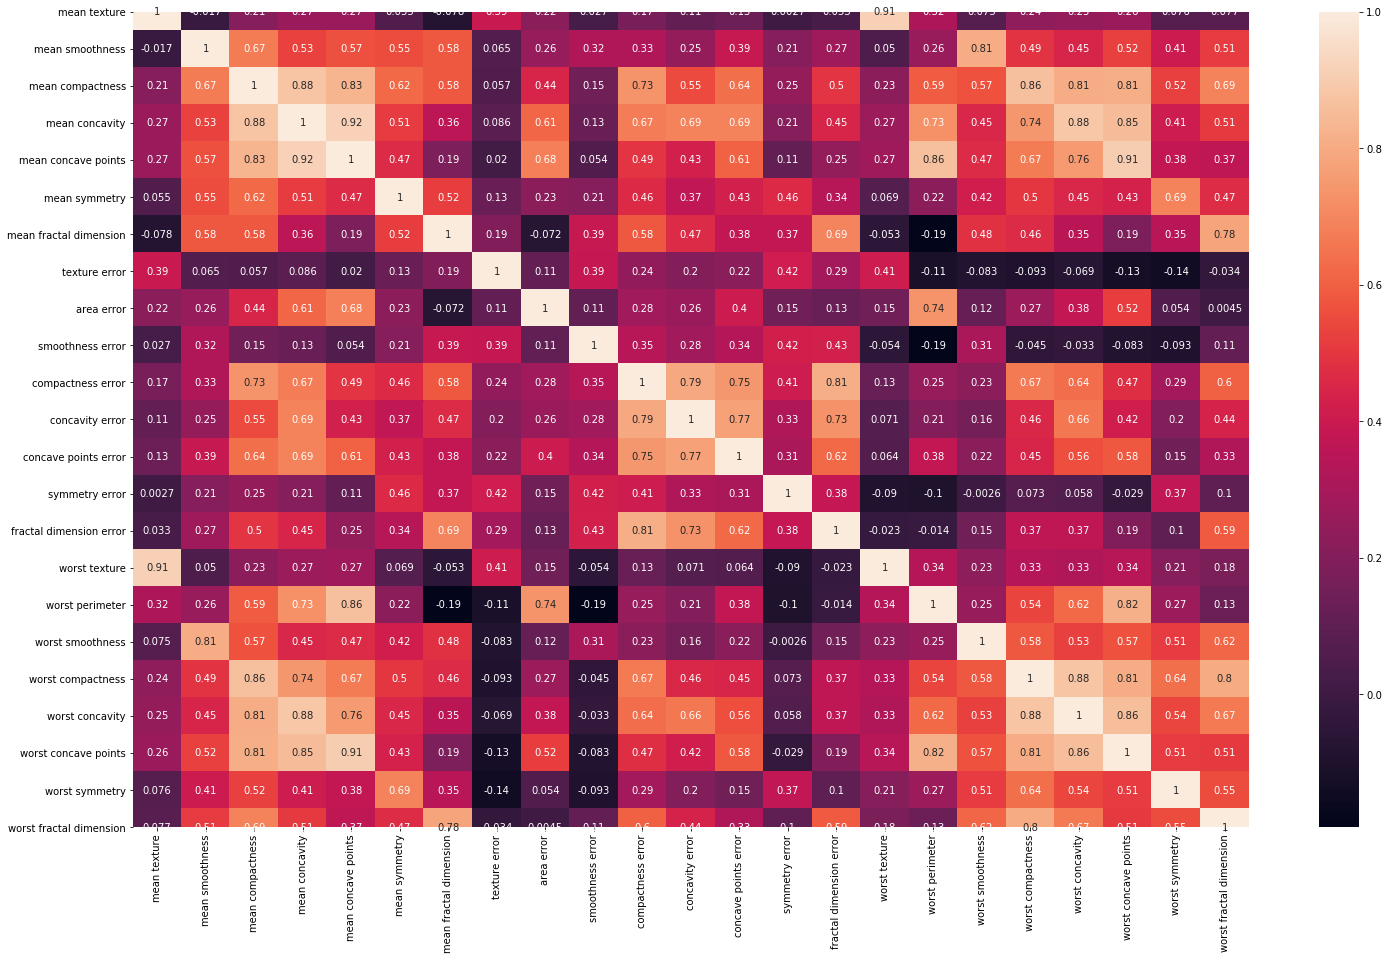

In [293]:
# Corrolation between features
plt.figure(figsize =(25,15))
sns.heatmap(X_train_corr_rf.corr(), annot=True)               


# Machine Learning Algorithm

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import time
import pickle

In [97]:
def run_randomForests(X_train, X_test, y_train, y_test):
    a = time.time()
    rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)
    filename = "model_random_forest.pkl"  
    pickle.dump(rf, open(filename, 'wb'))
    # load the model from disk
    rf = pickle.load(open(filename, 'rb'))
    b = time.time()
    print('Time: ', b-a)
    pred_train = rf.predict_proba(X_train)
    pred_test = rf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_train,  pred_train[:,1])
    auc = roc_auc_score(y_train, pred_train[:,1])
    plt.plot(fpr,tpr,label="Train Set, auc="+str(auc))
    fpr, tpr, _ = roc_curve(y_test,  pred_test[:,1])
    auc = roc_auc_score(y_test, pred_test[:,1])
    plt.plot(fpr,tpr,label="Test Set, auc="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    

Time:  0.1361551284790039


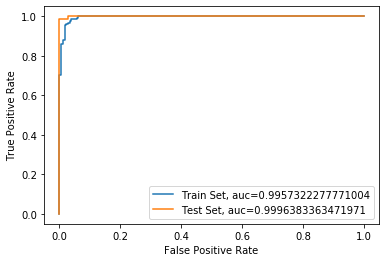

In [98]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

In [91]:
run_randomForests(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

NameError: name 'X_train_corr' is not defined

Time:  0.15646910667419434


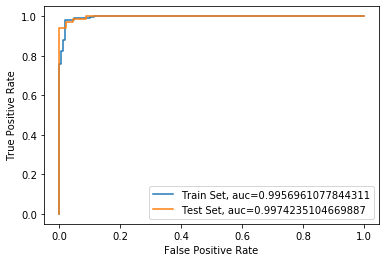

In [358]:
run_randomForests(X_train_corr_rf,
                  X_test_corr_rf,
                  y_train, y_test)

In [92]:
def run_logistic(X_train, X_test, y_train, y_test):
    a = time.time()
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    filename = "model_logistic.pkl"  
    pickle.dump(logit, open(filename, 'wb'))

    print('Train set')
    pred = logit.predict_proba(X_train)
    b = time.time()
    y_predict = logit.predict(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Time: ', b-a)
     print('Test set')
     
    # load the model from disk
    logit = pickle.load(open(filename, 'rb'))
    pred = logit.predict_proba(X_test)
    y_predict = logit.predict(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    #cm = confusion_matrix(y_test, y_predict)
    #sns.heatmap(cm, annot=True)
    print(classification_report(y_test, y_predict))

In [96]:
run_logistic(X_train,
                  X_test,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9933138235174572
Time:  0.01464700698852539
Test set
Logistic Regression roc-auc: 0.9996383363471971
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        35
         1.0       0.99      1.00      0.99        79

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [377]:
run_logistic(X_train_corr,
                  X_test_corr,
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.9886269128409848
Time:  0.01315617561340332
Test set
Logistic Regression roc-auc: 0.9932367149758453
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        45
         1.0       0.96      0.97      0.96        69

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [378]:
run_logistic(X_train_corr_rf,
                  X_test_corr_rf,
                  y_train, y_test)


Train set
Logistic Regression roc-auc: 0.9876704923486361
Time:  0.006779909133911133
Test set
Logistic Regression roc-auc: 0.9893719806763285
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        45
         1.0       0.96      0.97      0.96        69

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
run_logistic(X_train_chi,
                  X_test_chi,
                  y_train, y_test)

In [366]:
def roc_auc_plot(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)
    y_pred_prob1 = rf.predict_proba(X_test)[:,1]
    fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
    auc1 = roc_auc_score(y_test, y_pred_prob1)


    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    y_pred_prob2 = logit.predict_proba(X_test)[:,1]
    fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
    auc2 = roc_auc_score(y_test, y_pred_prob2)


    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr1, tpr1, label= "Random Forest, auc="+str(round(auc1,3)))
    plt.plot(fpr2, tpr2, label= "Logistic Regression, auc="+ str(round(auc2,3)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title('Receiver Operating Characteristic')
    plt.show()

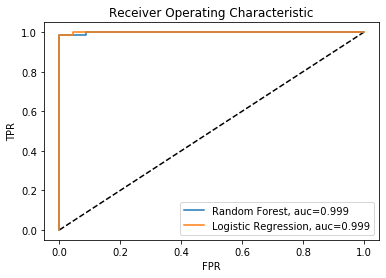

In [367]:
roc_auc_plot(X_train,X_test,y_train,y_test)

In [ ]:
roc_auc_plot(X_train_corr,X_test_corr,y_train,y_test)

In [ ]:
roc_auc_plot(X_train_corr_rf,X_test_corr_rf,y_train,y_test)

## Other feature selection methods: Wrapper methods

### Step-forward-feature

In [368]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [369]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), 
           k_features=10, # the more features we want, the longer it will take to run
           forward=True, 
           floating=False,
           verbose=2,
           scoring='roc_auc',
           cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   17.4s finished

[2020-12-02 12:34:33] Features: 1/10 -- score: 0.9330205245585517[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   13.0s finished

[2020-12-02 12:34:46] Features: 2/10 -- score: 0.9706937870529738[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   10.5s finished

[2020-12-02 12:34:57] Features: 3/10 -- score: 0.9747342544782304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [370]:
X_train.columns[list(sfs.k_feature_idx_)]

Index(['mean texture', 'mean area', 'mean concave points', 'area error',
       'concavity error', 'symmetry error', 'fractal dimension error',
       'worst texture', 'worst perimeter', 'worst smoothness'],
      dtype='object')

In [371]:
selected_feat_forward = X_train.columns[list(sfs.k_feature_idx_)]

Time:  0.13371992111206055


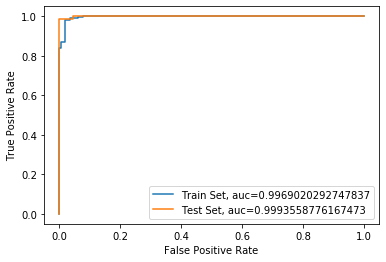

In [372]:
run_randomForests(X_train[selected_feat_forward],
                  X_test[selected_feat_forward],
                  y_train, y_test)

### Step-backward-feature

In [373]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0),
          k_features=15, # the lower the features we want, the longer this will take
          forward=False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=2)
sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.4s finished

[2020-12-02 12:37:00] Features: 29/15 -- score: 0.9866073918690635[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   10.2s finished

[2020-12-02 12:37:11] Features: 28/15 -- score: 0.9843403873430229[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    9.9s finished

[2020-12-02 12:37:20] Features: 27/15 -- score: 0.9856611465704086[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [374]:
X_train.columns[list(sfs.k_feature_idx_)]


Index(['mean texture', 'mean perimeter', 'mean compactness', 'mean symmetry',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'worst radius', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst symmetry'],
      dtype='object')

In [375]:
selected_feat_backward = X_train.columns[list(sfs.k_feature_idx_)]

Time:  0.14551877975463867


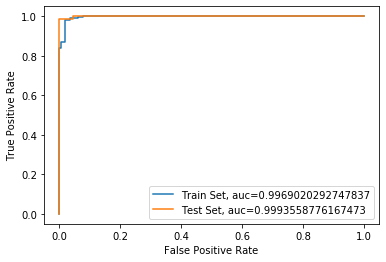

In [376]:
run_randomForests(X_train[selected_feat_forward],
                  X_test[selected_feat_forward],
                  y_train, y_test)